<a href="https://colab.research.google.com/github/myconcordia/COMP478/blob/main/Tutorial2COMP478.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python modules**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

print(cv2.__version__, cv2.__spec__)
#print(cv2.getBuildInformation())

**Mount Google Drive: First mount and authenticate yourself**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
os.chdir("/content/drive/My Drive/")
os.listdir()

# **Image Processing Fundamentals**

**Image translation**

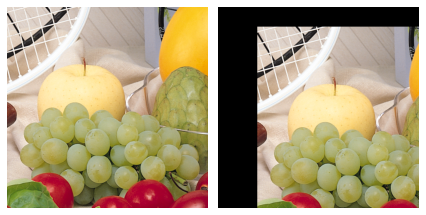

In [5]:
I = cv2.imread('./images/fruits.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
rows, cols, ch = I.shape
tx = 100; ty = 50
M = np.float32([[1,0,tx],[0,1,ty]])
J = cv2.warpAffine(I, M, (cols,rows))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Image rotation**

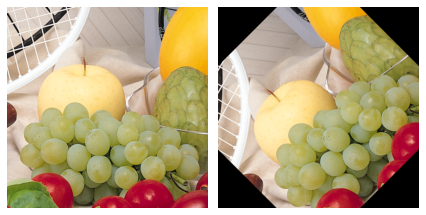

In [7]:
theta = 45
M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1)
J = cv2.warpAffine(I, M, (cols,rows))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

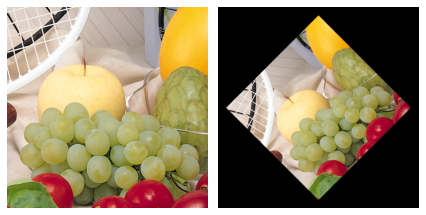

In [8]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,0.65) #replace the scale 1 with 0.65 to see the full image
J = cv2.warpAffine(I,M,(cols,rows))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Image Scaling**

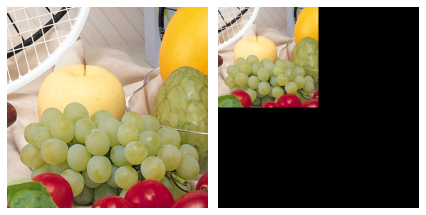

In [9]:
cx = .5; cy = .5
M = np.float32([[cx,0,0],[0,cy,0]])
I_scale = cv2.warpAffine(I, M, (cols,rows))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_scale), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Horizontal shearing**

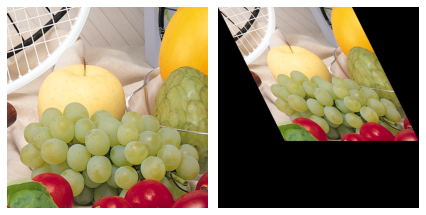

In [11]:
sh = .5
M = np.float32([[1,sh,0],[0,1,0]])
I_vshear = cv2.warpAffine(I,M,(int(cols*1.5), int(rows*1.5)))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_vshear), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

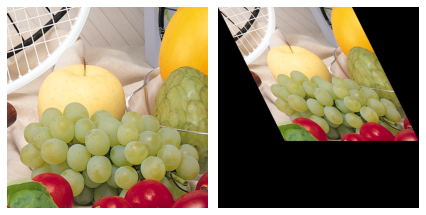

In [12]:
sh = .5
M = np.float32([[1, sh, 0], [0, 1, 0], [0, 0, 1]])
J = cv2.warpPerspective(I,M,(int(cols*1.5), int(rows*1.5)))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Vertical shearing**

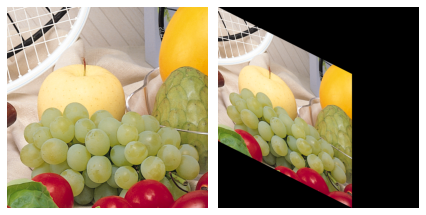

In [13]:
sv = .5
M = np.float32([[1, 0, 0], [sv, 1, 0], [0, 0, 1]])
J = cv2.warpPerspective(I,M,(int(cols*1.5),int(rows*1.5)))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

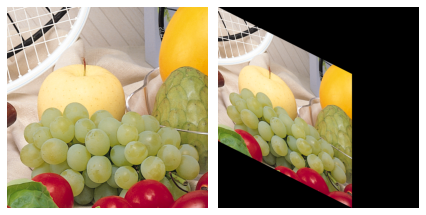

In [14]:
sv = .5
M = np.float32([[1,0,0],[sv,1,0]])
J = cv2.warpAffine(I,M,(int(cols*1.5),int(rows*1.5)))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Image Flipping**

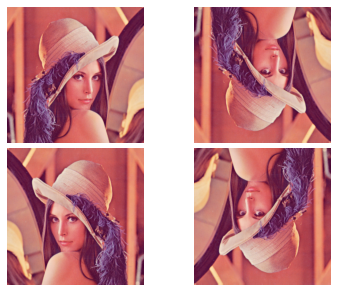

In [15]:
I = cv2.imread('./images/lenacolor256.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I_flipVertical = cv2.flip(I, 0)
I_flipHorizontal = cv2.flip(I, 1)
I_flipBoth = cv2.flip(I, -1)


plt.subplot(221), plt.imshow(I), plt.axis('off')
plt.subplot(222), plt.imshow(I_flipVertical), plt.axis('off')
plt.subplot(223), plt.imshow(I_flipHorizontal), plt.axis('off')
plt.subplot(224), plt.imshow(I_flipBoth), plt.axis('off')
plt.tight_layout(pad=.5)
plt.show() 

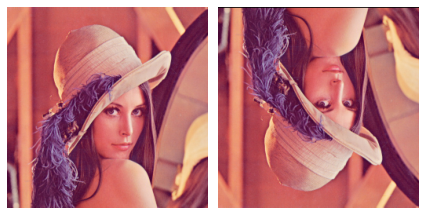

In [17]:
#To flip the image horizontally:
rows, cols, ch = I.shape
M = np.float32([[1, 0, 0], [0, -1, rows],[0,  0, 1]])
J = cv2.warpPerspective(I,M,(int(cols),int(rows)))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

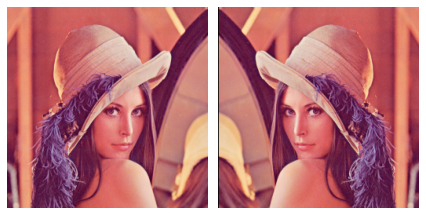

In [18]:
#To flip the image vertically:
M = np.float32([[-1, 0, cols],[0, 1, 0],[0, 0, 1]])
J = cv2.warpPerspective(I,M,(int(cols),int(rows)))

plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Image Warp**

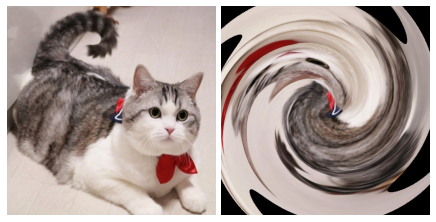

In [19]:
from skimage.transform import warp
I = cv2.imread('./images/cat.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
def swirling(xy, x0, y0, R):
    r = np.sqrt((xy[:,1]-x0)**2 + (xy[:,0]-y0)**2)
    a = np.pi*r / R
    xy[:, 1], xy[:, 0] = (xy[:, 1]-x0)*np.cos(a) + (xy[:, 0]-y0)*np.sin(a) + x0, -(xy[:, 1]-x0)*np.sin(a) + (xy[:, 0]-y0)*np.cos(a) + y0
    return xy

I_warped = warp(I, swirling, map_args={'x0':250, 'y0':250, 'R':200})

plt.subplot(121), plt.imshow(I), plt.axis('off'), 
plt.subplot(122), plt.imshow(I_warped),  plt.axis('off')
plt.tight_layout(pad=.5)
plt.show()

**Image Swirl**

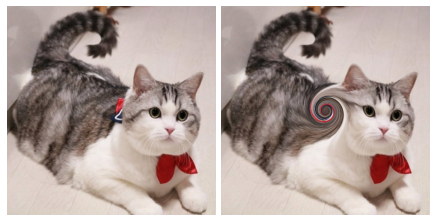

In [20]:
from skimage.transform import warp, swirl
I = cv2.imread('./images/cat.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I_swirl = swirl(I, rotation=0, strength=20, radius=120)

plt.subplot(121), plt.imshow(I), plt.axis('off'), 
plt.subplot(122), plt.imshow(I_swirl),  plt.axis('off')
plt.tight_layout(pad=.5)
plt.show()

**Image Affine Transformation**

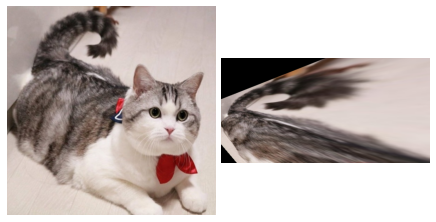

In [23]:
I = cv2.imread('./images/cat.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
ows, cols = I.shape[:2]
#src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
#dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]]) 
src_points = np.float32([[0,0], [0,rows-1], [cols/2,0], [cols/2,rows-1]])
dst_points = np.float32([[0,100], [0,rows-101], [cols/2,0], [cols/2,rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
I_affine = cv2.warpPerspective(I, projective_matrix, (cols,rows))

plt.subplot(121), plt.imshow(I), plt.axis('off'), 
plt.subplot(122), plt.imshow(I_affine),  plt.axis('off')
plt.tight_layout(pad=.5)
plt.show()